<a href="https://colab.research.google.com/github/lobasfs/LFS/blob/main/2semestr_dz5%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

clustering_physical_activity_data_path = kagglehub.competition_download('clustering-physical-activity-data')

print('Data source import complete.')



100%|██████████| 103M/103M [00:00<00:00, 171MB/s] 

Extracting files...


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Считываем файл
train = pd.read_csv('Physical_Activity_Monitoring_unlabeled.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534601 entries, 0 to 534600
Data columns (total 53 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   timestamp          534601 non-null  float64
 1   handTemperature    530560 non-null  float64
 2   handAcc16_1        530560 non-null  float64
 3   handAcc16_2        530560 non-null  float64
 4   handAcc16_3        530560 non-null  float64
 5   handAcc6_1         530560 non-null  float64
 6   handAcc6_2         530560 non-null  float64
 7   handAcc6_3         530560 non-null  float64
 8   handGyro1          530560 non-null  float64
 9   handGyro2          530560 non-null  float64
 10  handGyro3          530560 non-null  float64
 11  handMagne1         530560 non-null  float64
 12  handMagne2         530560 non-null  float64
 13  handMagne3         530560 non-null  float64
 14  handOrientation1   530560 non-null  float64
 15  handOrientation2   530560 non-null  float64
 16  ha

In [ ]:
train.head()

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,252.75,34.8750,0.902847,7.45872,6.032490,1.006100,7.44575,6.303650,-0.021952,0.004114,...,-0.025606,0.030239,-14.5447,27.3336,-5.76620,0.206416,0.348212,0.763201,-0.503652,5
1,3652.45,29.7500,-4.069330,3.76168,8.279720,-5.972500,3.22273,6.908970,0.116054,-0.375968,...,-0.670163,1.786200,-32.8257,-15.7719,-1.31395,0.578332,-0.566734,0.405888,-0.423791,2
2,504.76,34.3750,-2.007540,-9.60180,0.773674,-1.803500,-9.58937,1.073680,0.020131,0.042189,...,-0.009741,-0.006579,-18.8171,16.3089,25.29280,0.139776,0.676586,0.393796,0.606316,8
3,2801.61,31.9375,-13.262200,5.85443,0.899334,-13.611500,5.91511,0.840377,1.715630,-0.050492,...,-0.163470,-3.495570,-26.7418,34.3566,21.32740,0.416303,0.783387,0.306464,0.345075,2
4,441.01,33.5000,-0.013940,8.66540,4.398210,0.144153,8.56816,4.822200,-0.006938,-0.007383,...,-0.028172,-0.003737,-17.7798,-3.9981,10.99500,0.171133,-0.748343,0.252988,-0.588807,6


In [ ]:
# Заведем новый DataFrame, чтобы не загружать каждый раз в Colab
train_copy = train.copy()
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534601 entries, 0 to 534600
Data columns (total 53 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   timestamp          534601 non-null  float64
 1   handTemperature    530560 non-null  float64
 2   handAcc16_1        530560 non-null  float64
 3   handAcc16_2        530560 non-null  float64
 4   handAcc16_3        530560 non-null  float64
 5   handAcc6_1         530560 non-null  float64
 6   handAcc6_2         530560 non-null  float64
 7   handAcc6_3         530560 non-null  float64
 8   handGyro1          530560 non-null  float64
 9   handGyro2          530560 non-null  float64
 10  handGyro3          530560 non-null  float64
 11  handMagne1         530560 non-null  float64
 12  handMagne2         530560 non-null  float64
 13  handMagne3         530560 non-null  float64
 14  handOrientation1   530560 non-null  float64
 15  handOrientation2   530560 non-null  float64
 16  ha

In [ ]:
# Пропуски и их количество
train_copy.isnull().sum()

,0
timestamp,0
handTemperature,4041
handAcc16_1,4041
handAcc16_2,4041
handAcc16_3,4041
handAcc6_1,4041
handAcc6_2,4041
handAcc6_3,4041
handGyro1,4041
handGyro2,4041


In [ ]:
train_copy.value_counts()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,count
timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,handOrientation1,handOrientation2,handOrientation3,handOrientation4,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,chestOrientation1,chestOrientation2,chestOrientation3,chestOrientation4,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id,
4007.73,28.8125,0.545435,29.49870,0.987907,2.93261,24.79460,1.08411,-0.274418,3.007870,3.122790,31.68300,-20.7941,-31.0694,0.957508,-0.2882,0.007258,-0.008134,32.0625,3.853340,19.89260,-5.33476,2.861840,12.93630,-3.17311,1.662280,1.639190,-1.540100,15.870600,-28.1860,28.4777,0.489658,-0.651646,-0.548566,-0.186192,31.5625,18.77620,9.08679,11.851200,6.87460,22.33040,3.911010,-1.024150,0.407148,-5.459050,-38.0618,-13.9169,5.92783,0.364951,-0.443733,0.593725,-0.563385,2,1
37.66,30.3750,2.215300,8.27915,5.587530,2.24689,8.55387,5.77143,-0.004750,0.037579,-0.011145,8.93200,-67.9326,-19.9755,1.000000,0.0000,0.000000,0.000000,32.1875,0.124482,9.65003,-1.65181,0.143941,9.71019,-1.47347,0.036668,0.016559,-0.052791,0.567566,-50.7269,44.2728,1.000000,0.000000,0.000000,0.000000,30.7500,9.73855,-1.84761,0.095156,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.36960,1.000000,0.000000,0.000000,0.000000,1,1
37.70,30.3750,2.301060,7.25857,6.092590,2.20720,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,-67.1825,-20.0857,1.000000,0.0000,0.000000,0.000000,32.1875,0.352225,9.72437,-1.68665,0.173568,9.69512,-1.53414,0.000275,-0.013352,-0.039315,0.462317,-50.7110,42.9228,1.000000,0.000000,0.000000,0.000000,30.7500,9.77578,-1.88582,0.095775,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.88470,1.000000,0.000000,0.000000,0.000000,1,1
37.71,30.3750,2.071650,7.25965,6.012180,2.19238,7.21038,6.01604,0.063895,0.007175,0.024701,8.60505,-66.7184,-19.8429,1.000000,0.0000,0.000000,0.000000,32.1875,0.271221,9.64826,-1.84275,0.188981,9.72523,-1.50392,-0.002481,-0.018131,-0.045486,1.010820,-50.4054,44.1573,1.000000,0.000000,0.000000,0.000000,30.7500,9.65780,-1.92147,-0.098161,9.60177,-1.75239,0.311276,0.003793,-0.026906,0.004125,-61.3257,-36.9744,-57.75010,1.000000,0.000000,0.000000,0.000000,1,1
37.72,30.3750,2.411480,7.59780,5.939150,2.23988,7.46679,6.03053,0.190837,0.003116,0.038762,9.16003,-66.8578,-19.9665,1.000000,0.0000,0.000000,0.000000,32.1875,0.274553,9.61139,-1.72641,0.158971,9.67993,-1.44342,0.024609,-0.022451,-0.033739,1.261700,-50.9669,43.5475,1.000000,0.000000,0.000000,0.000000,30.7500,9.65839,-1.80756,-0.098862,9.67694,-1.76748,0.326060,0.036814,-0.032277,-0.006866,-61.5520,-36.9632,-57.99570,1.000000,0.000000,0.000000,0.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37.99,30.3750,2.426450,8.01815,6.284340,2.32321,8.10078,6.34617,0.113183,-0.193454,-0.003693,8.83044,-66.7329,-19.7299,1.000000,0.0000,0.000000,0.000000,32.1875,0.505528,9.61119,-1.64478,0.294433,9.67961,-1.42913,-0.006455,0.026640,-0.032205,1.290280,-51.7489,43.4243,1.000000,0.000000,0.000000,0.000000,30.7500,9.65360,-1.88221,-0.252807,9.60145,-1.76761,0.235651,0.013994,-0.028029,0.008868,-61.3252,-37.0831,-57.87510,1.000000,0.000000,0.000000,0.000000,1,1
37.98,30.3750,2.271810,8.09419,6.166310,2.24558,7.99547,6.18037,0.233565,-0.149083,0.011845,9.16052,-66.7490,-19.9654,1.000000,0.0000,0.000000,0.000000,32.1875,0.391284,9.64920,-1.64698,0.188777,9.66481,-1.47387,0.015053,-0.031533,-0.031936,0.7938

In [ ]:
train_copy_nonan = train_copy.copy()
# Cобираем в список колонки с пропусками
cols_with_nan = train_copy_nonan.columns[train_copy_nonan.isna().any()].tolist()
len(cols_with_nan)
# Для каждой колонки с пропусками
for col in cols_with_nan:
    # группируем по субъекту
    train_copy_nonan[col] = train_copy_nonan.groupby('subject_id')[col].transform(
        # и заполняем пропуски средним для него значением
        lambda x: x.fillna(x.mean())
    )

# проверим результат
train_copy_nonan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534601 entries, 0 to 534600
Data columns (total 53 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   timestamp          534601 non-null  float64
 1   handTemperature    534601 non-null  float64
 2   handAcc16_1        534601 non-null  float64
 3   handAcc16_2        534601 non-null  float64
 4   handAcc16_3        534601 non-null  float64
 5   handAcc6_1         534601 non-null  float64
 6   handAcc6_2         534601 non-null  float64
 7   handAcc6_3         534601 non-null  float64
 8   handGyro1          534601 non-null  float64
 9   handGyro2          534601 non-null  float64
 10  handGyro3          534601 non-null  float64
 11  handMagne1         534601 non-null  float64
 12  handMagne2         534601 non-null  float64
 13  handMagne3         534601 non-null  float64
 14  handOrientation1   534601 non-null  float64
 15  handOrientation2   534601 non-null  float64
 16  ha

In [ ]:
# Исследуем колонку subject_id
train_copy_nonan['subject_id'].value_counts()

,count
subject_id,
5,76793
8,73047
6,70240
1,69882
2,68740
4,63740
7,62115
3,50044


In [ ]:
df = train_copy_nonan

In [ ]:
# создаем новые признаки и сразу заполняем их значением длины соответствующего вектора
df['handAcc16'] = (df['handAcc16_1']**2 + df['handAcc16_2']**2 + df['handAcc16_3']**2)**0.5
df['handAcc6'] = (df['handAcc6_1']**2 + df['handAcc6_2']**2 + df['handAcc6_3']**2)**0.5
df['handGyro'] = (df['handGyro1']**2 + df['handGyro2']**2 + df['handGyro3']**2)**0.5
df['handMagne'] = (df['handMagne1']**2 + df['handMagne2']**2 + df['handMagne3']**2)**0.5
df['handOrientation'] = (df['handOrientation1']**2 + df['handOrientation2']**2 + df['handOrientation3']**2 + df['handOrientation4']**2 + df['handTemperature']**2)**0.5
df['chestAcc16'] = (df['chestAcc16_1']**2 + df['chestAcc16_2']**2 + df['chestAcc16_3']**2)**0.5
df['chestAcc6'] = (df['chestAcc6_1']**2 + df['chestAcc6_2']**2 + df['chestAcc6_3']**2)**0.5
df['chestGyro'] = (df['chestGyro1']**2 + df['chestGyro2']**2 + df['chestGyro3']**2)**0.5
df['chestMagne'] = (df['chestMagne1']**2 + df['chestMagne2']**2 + df['chestMagne3']**2)**0.5
df['chestOrientation'] = (df['chestOrientation1']**2 + df['chestOrientation2']**2 + df['chestOrientation3']**2 + df['chestOrientation4']**2 + df['chestTemperature']**2)**0.5
df['ankleAcc16'] = (df['ankleAcc16_1']**2 + df['ankleAcc16_2']**2 + df['ankleAcc16_3']**2)**0.5
df['ankleAcc6'] = (df['ankleAcc6_1']**2 + df['ankleAcc6_2']**2 + df['ankleAcc6_3']**2)**0.5
df['ankleGyro'] = (df['ankleGyro1']**2 + df['ankleGyro2']**2 + df['ankleGyro3']**2)**0.5
df['ankleMagne'] = (df['ankleMagne1']**2 + df['ankleMagne2']**2 + df['ankleMagne3']**2)**0.5
df['ankleOrientation'] = (df['ankleOrientation1']**2 + df['ankleOrientation2']**2 + df['ankleOrientation3']**2 + df['ankleOrientation4']**2 + df['ankleTemperature']**2)**0.5

# удаляем признаки, учтенные в длинах векторов
df = df.drop(
    columns = [
        'handAcc16_1','handAcc16_2','handAcc16_3','handAcc6_1','handAcc6_2','handAcc6_3',
        'handGyro1','handGyro2','handGyro3','handMagne1','handMagne2','handMagne3',
        'handOrientation1','handOrientation2','handOrientation3', 'handOrientation4', 'handTemperature',
        'chestAcc16_1','chestAcc16_2','chestAcc16_3','chestAcc6_1','chestAcc6_2','chestAcc6_3',
        'chestGyro1','chestGyro2','chestGyro3','chestMagne1','chestMagne2','chestMagne3',
        'chestOrientation1','chestOrientation2','chestOrientation3', 'chestOrientation4', 'chestTemperature',
        'ankleAcc16_1','ankleAcc16_2','ankleAcc16_3','ankleAcc6_1','ankleAcc6_2','ankleAcc6_3',
        'ankleGyro1','ankleGyro2','ankleGyro3','ankleMagne1','ankleMagne2','ankleMagne3',
        'ankleOrientation1','ankleOrientation2','ankleOrientation3', 'ankleOrientation4', 'ankleTemperature'
    ]
)

# смотрим результат
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534601 entries, 0 to 534600
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         534601 non-null  float64
 1   subject_id        534601 non-null  int64  
 2   handAcc16         534601 non-null  float64
 3   handAcc6          534601 non-null  float64
 4   handGyro          534601 non-null  float64
 5   handMagne         534601 non-null  float64
 6   handOrientation   534601 non-null  float64
 7   chestAcc16        534601 non-null  float64
 8   chestAcc6         534601 non-null  float64
 9   chestGyro         534601 non-null  float64
 10  chestMagne        534601 non-null  float64
 11  chestOrientation  534601 non-null  float64
 12  ankleAcc16        534601 non-null  float64
 13  ankleAcc6         534601 non-null  float64
 14  ankleGyro         534601 non-null  float64
 15  ankleMagne        534601 non-null  float64
 16  ankleOrientation  53

<Axes: >

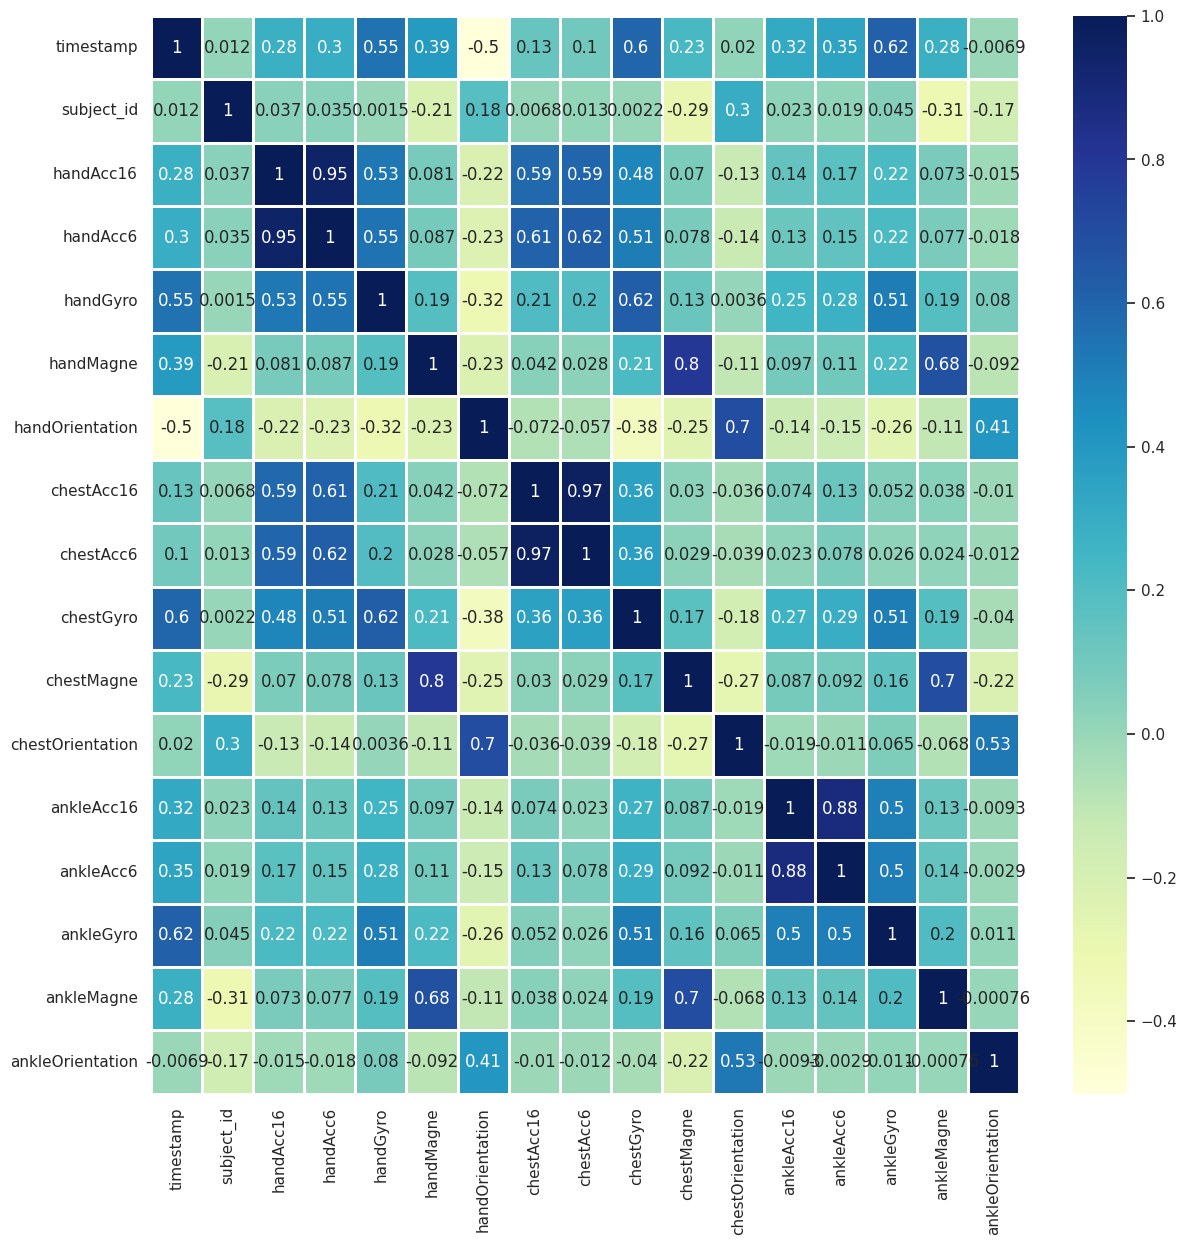

In [ ]:
# Смотрим на корреляцию
import seaborn as sns
sns.set(rc = {'figure.figsize':(14, 14)})
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu", linecolor='white', linewidths=1)

In [ ]:
#Удаляем признаки в пределах 0,9
df.drop(['handAcc6', 'chestAcc6', 'ankleAcc6'], axis=1, inplace=True)

In [ ]:
# Выбираем 20% случайных объектов
df = df.groupby('subject_id').apply(lambda x: x.sample(frac=0.2, random_state=42)).reset_index(drop=True)
# проверим распределение между субъектами
df['subject_id'].value_counts()

<ipython-input-153-a17332624adb>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('subject_id').apply(lambda x: x.sample(frac=0.2, random_state=42)).reset_index(drop=True)


,count
subject_id,
5,15359
8,14609
6,14048
1,13976
2,13748
4,12748
7,12423
3,10009


In [ ]:
# Также удалим еще ненужные стольбцы
df.drop(['subject_id'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534601 entries, 0 to 534600
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         534601 non-null  float64
 1   handAcc16         534601 non-null  float64
 2   handGyro          534601 non-null  float64
 3   handMagne         534601 non-null  float64
 4   handOrientation   534601 non-null  float64
 5   chestAcc16        534601 non-null  float64
 6   chestGyro         534601 non-null  float64
 7   chestMagne        534601 non-null  float64
 8   chestOrientation  534601 non-null  float64
 9   ankleAcc16        534601 non-null  float64
 10  ankleGyro         534601 non-null  float64
 11  ankleMagne        534601 non-null  float64
 12  ankleOrientation  534601 non-null  float64
dtypes: float64(13)
memory usage: 53.0 MB


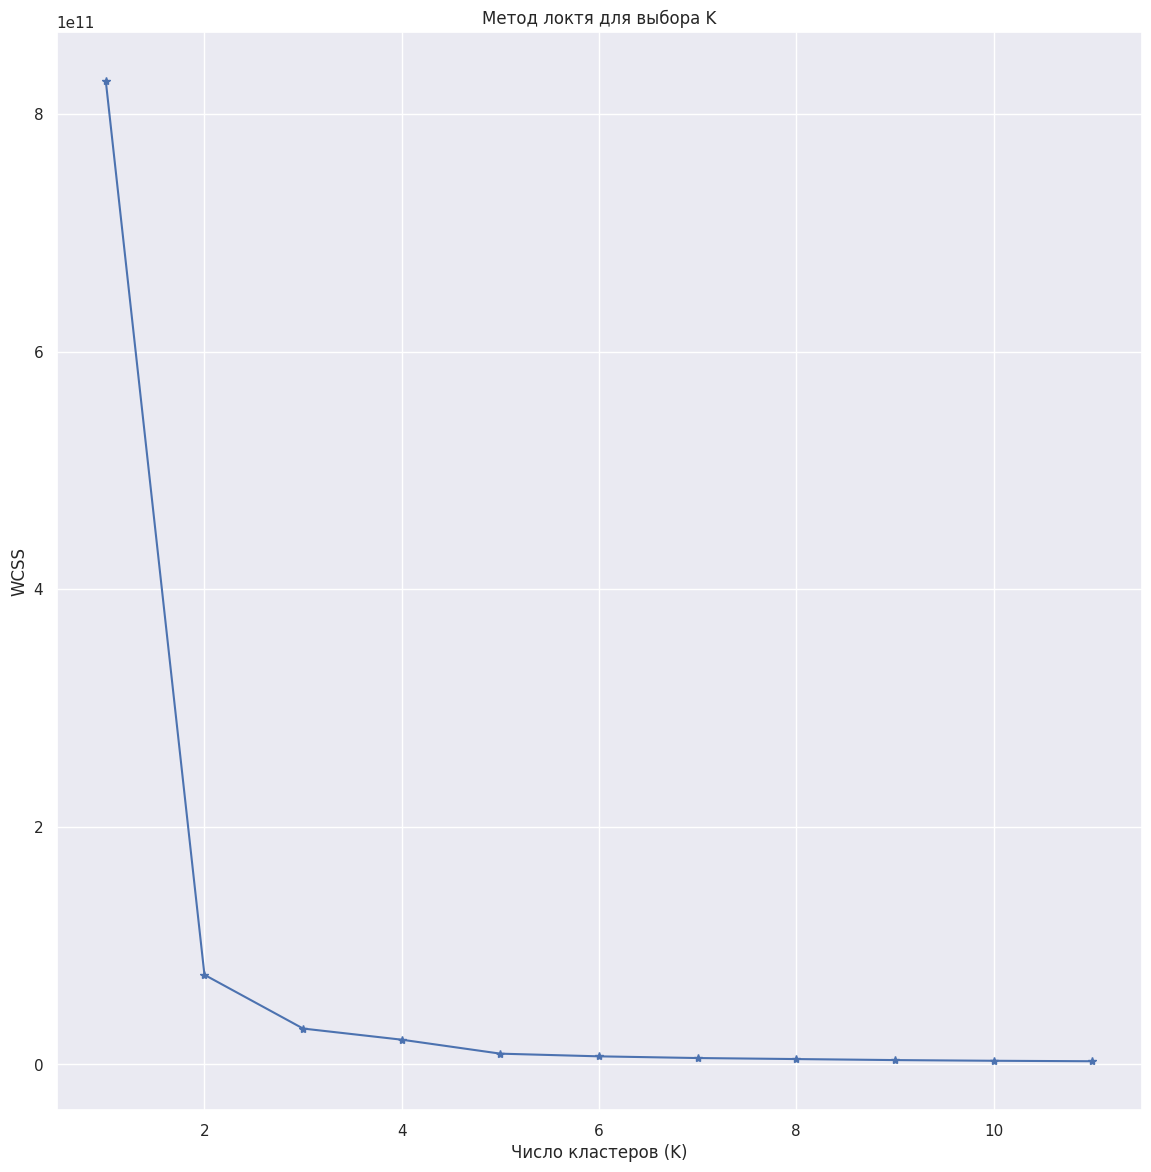

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Создадим вектор признаков
X = df
# Считаем WCSS для разных K
wcss = []
K_values = range(1, 12)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ -- сумма квадратов расстояний точек до центроидов

# Строим график
plt.plot(K_values, wcss, marker='*', linestyle='-')
plt.xlabel("Число кластеров (K)")
plt.ylabel("WCSS")
plt.title("Метод локтя для выбора K")
plt.show()

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
# инициализируем модель
model = KMeans(n_clusters=7)

# делаем кластеризацию
clusters = model.fit_predict(X)

# инициализируем конечный датафрейм
df_result = df
# добавляем колонку с кластерами
df_result['cluster'] = clusters
# добавляем колонку, в которую будем сохранять идентификатор активности
df_result['activityID'] = -1

# справочник соответствия номера кластера и идентификатора активности
dict = {}
# переменная для хранения идентификатора для следующей неизвестной активности
activityID = 1

for index, row in df_result.iterrows():
    if row['cluster'] in dict.keys():
        df_result.loc[index, 'activityID'] = dict[row['cluster']]
    else:
        dict[row['cluster']] = activityID
        df_result.loc[index, 'activityID'] = activityID
        activityID += 1

In [ ]:
# Создание файла submission.csv
submission = df_result[['activityID']].reset_index()
submission.columns = ['Index', 'activityID']
submission.to_csv('submission.csv', index=False)
submission.head(10)

,Index,activityID
0,0,1
1,1,2
2,2,3
3,3,4
4,4,3
5,5,5
6,6,1
7,7,4
8,8,6
9,9,4


In [ ]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
for i in [4,5,6]:
    # инициализируем алгоритм с соответствующим количеством кластеров
    kmeans = KMeans(n_clusters=i, random_state=42)

    # обучаем модель и получаем кластеры
    kmeans.fit(X)
    clusters_kmean = kmeans.predict(X)

    # считаем оценку
    score = silhouette_score(X, clusters_kmean)
    # и выводим ее в консоль
    print(f'Score KMeans for K={i}: {score}')

Score KMeans for K=4: 0.6518006891793048
Score KMeans for K=5: 0.6543840048096029
Score KMeans for K=6: 0.6221262270708691


In [ ]:
for i in [3,7,8]:
    # инициализируем алгоритм с соответствующим количеством кластеров
    kmeans = KMeans(n_clusters=i, random_state=42)

    # обучаем модель и получаем кластеры
    kmeans.fit(X)
    clusters_kmean = kmeans.predict(X)

    # считаем оценку
    score = silhouette_score(X, clusters_kmean)
    # и выводим ее в консоль
    print(f'Score KMeans for K={i}: {score}')

Score KMeans for K=3: 0.7775095534619798
Score KMeans for K=7: 0.6020971225877736
Score KMeans for K=8: 0.5571866550499085
